# Importing basic libraries

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import spacy
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Loading the dataset

In [94]:
df=pd.read_csv('Combined Data.csv/Combined Data.csv')
df.head()

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [95]:
# Drop the 'Unnamed: 0' column
df = df.drop(columns=['Unnamed: 0'])

# Display the first few rows to verify
df.head()

,statement,status
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,I've shifted my focus to something else but I'...,Anxiety
4,"I'm restless and restless, it's been a month n...",Anxiety


In [96]:
# Display the last few rows to verify
df.tail()

,statement,status
53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety
53039,"selfishness ""I don't feel very good, it's lik...",Anxiety
53040,Is there any way to sleep better? I can't slee...,Anxiety
53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety
53042,I have really bad door anxiety! It's not about...,Anxiety


# Summary of dataframe

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  52681 non-null  object
 1   status     53043 non-null  object
dtypes: object(2)
memory usage: 828.9+ KB


# Length of the Dataset

In [98]:
print("Length of Dataset:", len(df))

Length of Dataset: 53043


# size and shape of the dataset

In [99]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 53043
Number of columns: 2


# Description of the dataset

In [100]:
df.describe()

,statement,status
count,52681,53043
unique,51073,7
top,what do you mean?,Normal
freq,22,16351


# Exploratory Data Analysis

# Checking for missing values in the dataframe

In [101]:
print(df.isnull().sum())

statement    362
status         0
dtype: int64


# Dropping these missing values

In [102]:
df = df.dropna()
print(df.isnull().sum())

statement    0
status       0
dtype: int64


# Basic statistics of the dataset

In [103]:
# Calculate the length of each statement
df['statement_length'] = df['statement'].apply(len)

# Display basic statistics of statement lengths
print(df['statement_length'].describe())

count    52681.000000
mean       578.713863
std        846.269078
min          2.000000
25%         80.000000
50%        317.000000
75%        752.000000
max      32759.000000
Name: statement_length, dtype: float64


# Checking the number of nunique values in the dataset

In [104]:
df['status'].nunique()

7

# Checking the unique values in the dataset

In [105]:
df['status'].unique()

array(['Anxiety', 'Normal', 'Depression', 'Suicidal', 'Stress', 'Bipolar',
       'Personality disorder'], dtype=object)

# Number of characters and words per statement

In [106]:
# characters length
df['statment_length']=df['statement'].apply(lambda x:len(x))
# words length
df['num_of_words']=df['statement'].apply(lambda x:len(x.split()))
print("Maximum number of characters per statment:", df['statment_length'].max())
print("Maximum number of words per statment:", df['num_of_words'].max())


Maximum number of characters per statment: 32759
Maximum number of words per statment: 6300


# Distribution of the 'status' column with their value counts

In [107]:
# Check the distribution of the 'status' column with their value counts
sentiment_distribution = df['status'].value_counts()

# Display the distribution
print(sentiment_distribution)

status
Normal                  16343
Depression              15404
Suicidal                10652
Anxiety                  3841
Bipolar                  2777
Stress                   2587
Personality disorder     1077
Name: count, dtype: int64


<Axes: title={'center': 'Distribution of Sentiments'}, xlabel='status'>

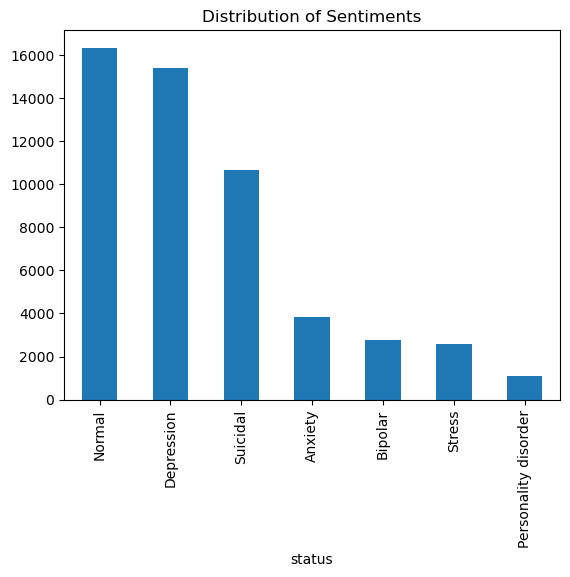

In [108]:
# plotting graph for visualizations
sentiment_distribution.plot(kind='bar', title='Distribution of Sentiments')

# Correlation between statement length and number of words

<Axes: >

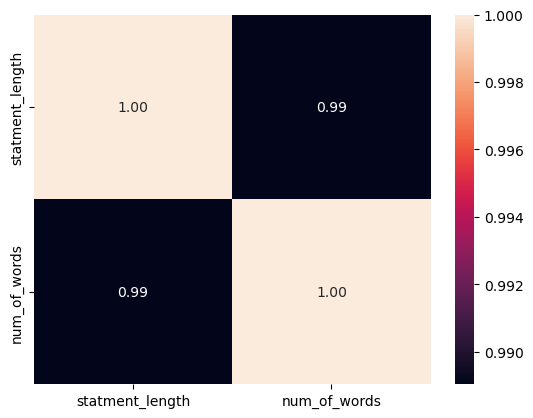

In [109]:
corr=df[['statment_length','num_of_words']].corr()
sns.heatmap(corr,annot=True,fmt='.2f')

# Data Preprocessing

In [110]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import download

# Download necessary NLTK resources
download('stopwords')
download('punkt')

# Define stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\masih\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\masih\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [111]:

# Preprocessing function
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    
    # Remove repetitive words (this keeps only unique words)
    tokens = list(set(tokens))
    
    # Reconstruct the text from tokens
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text





In [112]:
# Apply preprocessing to the 'statement' column
df['cleaned_statement'] = df['statement'].apply(preprocess_text)

# Display the DataFrame with cleaned text
print(df[['cleaned_statement', 'status']])

                                       cleaned_statement   status
0                                                gosh oh  Anxiety
1      restless sleeping tune mind trouble heart conf...  Anxiety
2      restless stay place back dear wrong doubt forward  Anxiety
3      focus ive else im shifted worried still something  Anxiety
4                             month restless im mean boy  Anxiety
...                                                  ...      ...
53038  yet july used mins scary life including would ...  Anxiety
53039  family scary life would brother say message ca...  Anxiety
53040       meds nights better sleep help way didnt cant  Anxiety
53041  much presentation certain hi difficult forget ...  Anxiety
53042  viceversa turning really else im fix wrong key...  Anxiety

[52681 rows x 2 columns]


# Balancing the Dataset

In [113]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Separate the features and the target variable
X = df['cleaned_statement']  # Using the preprocessed text data
y = df['status']  # Using the original status labels (categorical)

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y)

# Check the new class distribution
print('Original dataset shape:', Counter(y))
print('Resampled dataset shape:', Counter(y_resampled))




Original dataset shape: Counter({'Normal': 16343, 'Depression': 15404, 'Suicidal': 10652, 'Anxiety': 3841, 'Bipolar': 2777, 'Stress': 2587, 'Personality disorder': 1077})
Resampled dataset shape: Counter({'Anxiety': 16343, 'Normal': 16343, 'Depression': 16343, 'Suicidal': 16343, 'Stress': 16343, 'Bipolar': 16343, 'Personality disorder': 16343})


# Training and Testing Split

In [114]:
# Split the resampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Display the shapes of the train and test sets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (91520, 78550)
X_test shape: (22881, 78550)
y_train shape: (91520,)
y_test shape: (22881,)


# Baseline Model: Majority Class Classifier.

Accuracy of Majority Class Classifier on Test Data: 0.14
Classification Report for Majority Class Classifier:
                      precision    recall  f1-score   support

             Anxiety       0.00      0.00      0.00      3375
             Bipolar       0.00      0.00      0.00      3214
          Depression       0.00      0.00      0.00      3274
              Normal       0.00      0.00      0.00      3325
Personality disorder       0.00      0.00      0.00      3241
              Stress       0.14      1.00      0.25      3209
            Suicidal       0.00      0.00      0.00      3243

            accuracy                           0.14     22881
           macro avg       0.02      0.14      0.04     22881
        weighted avg       0.02      0.14      0.03     22881

ROC-AUC Score: 0.50


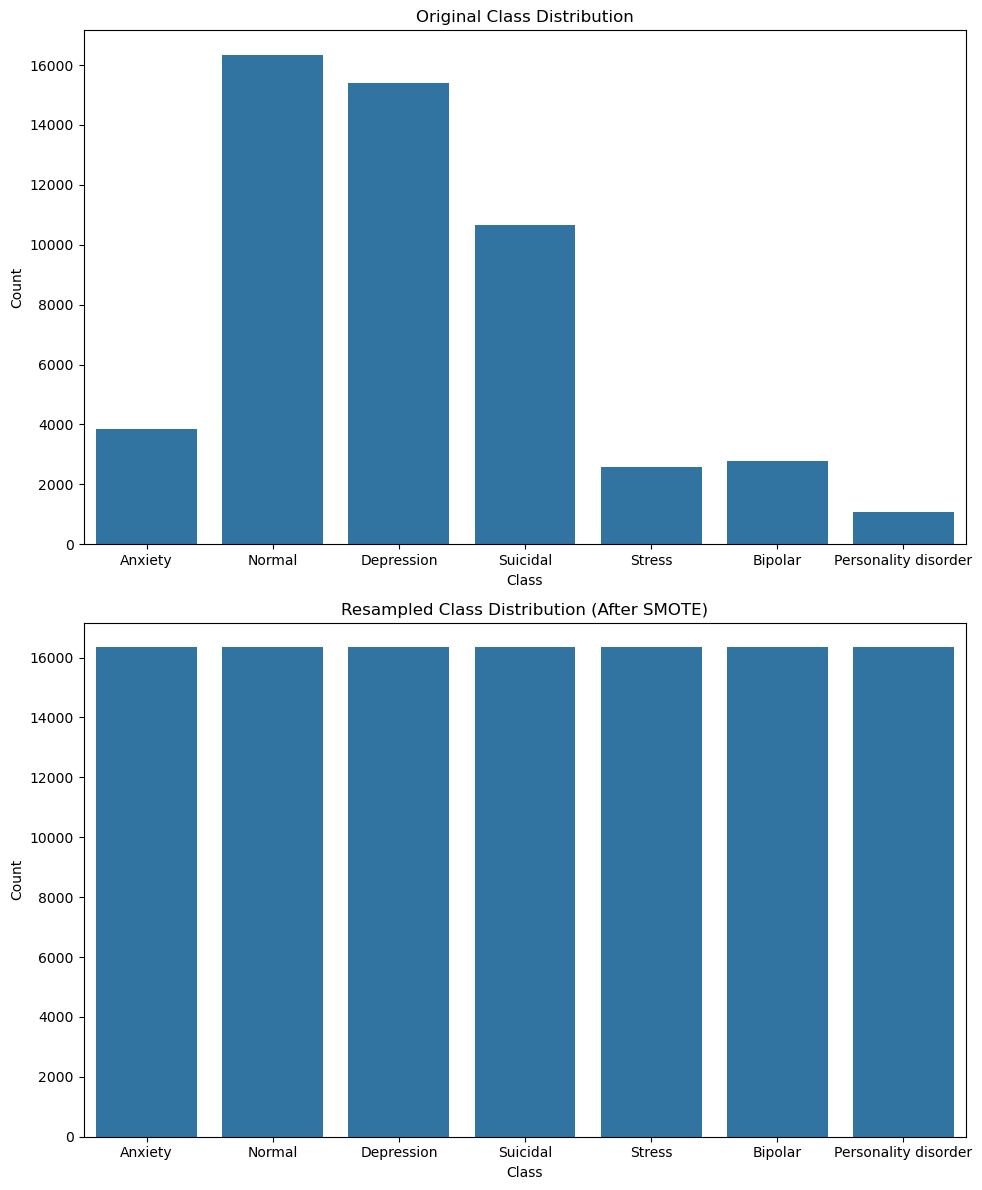

In [115]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import label_binarize


# Initialize the Majority Class Classifier
majority_class_clf = DummyClassifier(strategy='most_frequent')

# Fit the classifier on the training data
majority_class_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = majority_class_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Majority Class Classifier on Test Data: {accuracy:.2f}')

# Print the classification report
print("Classification Report for Majority Class Classifier:")
print(classification_report(y_test, y_pred, zero_division=0))

# Compute the ROC-AUC score (for multi-class problem) and Binarize the output labels for ROC-AUC calculation
y_test_bin = label_binarize(y_test, classes=majority_class_clf.classes_)
y_pred_bin = label_binarize(y_pred, classes=majority_class_clf.classes_)

# Compute the ROC-AUC score
roc_auc = roc_auc_score(y_test_bin, y_pred_bin, average='macro', multi_class='ovr')
print(f"ROC-AUC Score: {roc_auc:.2f}")

# Visualize the original and resampled class distribution
fig, ax = plt.subplots(2, 1, figsize=(10, 12)) 

# Original class distribution
sns.countplot(x=y, ax=ax[0])  
ax[0].set_title('Original Class Distribution')
ax[0].set_xlabel('Class')
ax[0].set_ylabel('Count')

# Resampled class distribution
sns.countplot(x=y_resampled, ax=ax[1])  
ax[1].set_title('Resampled Class Distribution (After SMOTE)')
ax[1].set_xlabel('Class')
ax[1].set_ylabel('Count')

plt.tight_layout()  
plt.show()


<Figure size 1000x700 with 0 Axes>

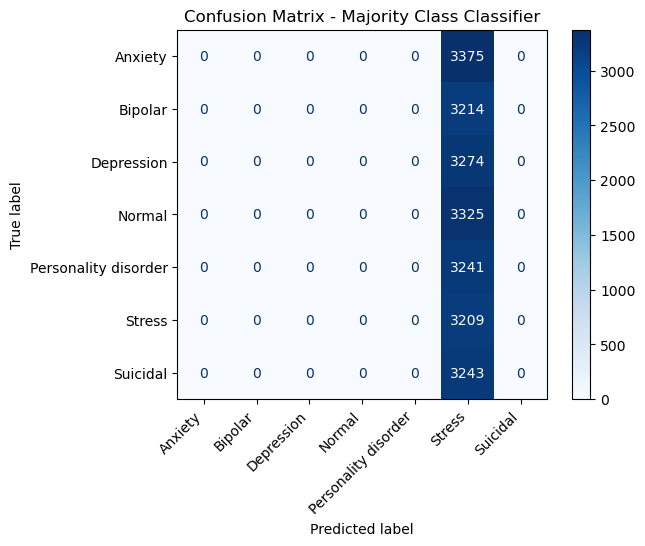

In [116]:
# Computing the confusion matrix for Majority Class Classifier
conf_matrix = confusion_matrix(y_test, y_pred, labels=majority_class_clf.classes_)

# Plot confusion matrix for Majority Class Classifier
plt.figure(figsize=(10, 7))
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=majority_class_clf.classes_)
disp.plot(cmap='Blues')
plt.xticks(rotation=45, ha='right')
plt.title('Confusion Matrix - Majority Class Classifier')
plt.show()


# Traditional Machine Learning Models

# Naive Bayes

In [117]:
from sklearn.naive_bayes import MultinomialNB

# Split the resampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize the Naive Bayes classifier
nb_clf = MultinomialNB()

# Train the classifier
nb_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_clf.predict(X_test)
y_prob = nb_clf.predict_proba(X_test)

# Print the classification report for each class label
print(classification_report(y_test, y_pred))

# Binarize the output labels for ROC-AUC calculation (for multi-class problems)
y_test_bin = label_binarize(y_test, classes=nb_clf.classes_)

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_test_bin, y_prob, multi_class='ovr')

print(f"ROC-AUC: {roc_auc:.2f}")


                      precision    recall  f1-score   support

             Anxiety       0.85      0.88      0.86      3375
             Bipolar       0.78      0.96      0.86      3214
          Depression       0.60      0.60      0.60      3274
              Normal       0.96      0.42      0.58      3325
Personality disorder       0.73      0.99      0.84      3241
              Stress       0.80      0.84      0.82      3209
            Suicidal       0.73      0.65      0.69      3243

            accuracy                           0.76     22881
           macro avg       0.78      0.76      0.75     22881
        weighted avg       0.78      0.76      0.75     22881

ROC-AUC: 0.97


# Hyperparameter tuning

Best Parameters: {'alpha': 0.1, 'fit_prior': False}
Classification Report:
                      precision    recall  f1-score   support

             Anxiety       0.87      0.93      0.90      3375
             Bipolar       0.87      0.97      0.92      3214
          Depression       0.69      0.59      0.63      3274
              Normal       0.93      0.62      0.75      3325
Personality disorder       0.86      0.99      0.92      3241
              Stress       0.86      0.93      0.89      3209
            Suicidal       0.71      0.78      0.75      3243

            accuracy                           0.83     22881
           macro avg       0.83      0.83      0.82     22881
        weighted avg       0.83      0.83      0.82     22881

ROC-AUC: 0.98


<Figure size 1000x800 with 0 Axes>

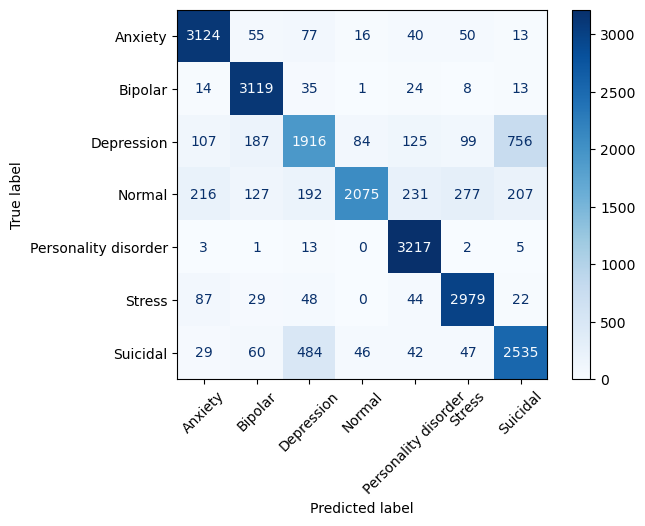

In [122]:
from sklearn.model_selection import  GridSearchCV

def tune_naive_bayes(X_resampled, y_resampled, param_grid, test_size=0.2, random_state=42, cv=5):
    """
    Function to perform hyperparameter tuning on a Multinomial Naive Bayes model.

    Parameters:
    - X_resampled: Feature matrix (sparse matrix or dense array).
    - y_resampled: Target vector.
    - param_grid: Dictionary of hyperparameters to tune.
    - test_size: Proportion of the dataset to include in the test split.
    - random_state: Controls the shuffling applied to the data before applying the split.
    - cv: Number of cross-validation folds.

    Returns:
    - best_nb_clf: Best Naive Bayes classifier object.
    - best_params: Best hyperparameters found.
    - metrics: Dictionary containing evaluation metrics (classification report, ROC-AUC, and confusion matrix).
    """
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=test_size, random_state=random_state)

    # Initialize the Naive Bayes classifier
    nb_clf = MultinomialNB()

    # Create the GridSearchCV object
    grid_search = GridSearchCV(nb_clf, param_grid, scoring='accuracy', cv=cv, n_jobs=-1)

    # Fit the GridSearchCV object to the training data
    grid_search.fit(X_train, y_train)

    # Get the best estimator and its parameters
    best_nb_clf = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Train the best estimator on the entire training set
    best_nb_clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = best_nb_clf.predict(X_test)
    y_prob = best_nb_clf.predict_proba(X_test)

    # Print the classification report
    classification_rep = classification_report(y_test, y_pred)

    # Binarize the output labels for ROC-AUC calculation (for multi-class problems)
    y_test_bin = label_binarize(y_test, classes=best_nb_clf.classes_)

    # Calculate the ROC-AUC score
    roc_auc = roc_auc_score(y_test_bin, y_prob, multi_class='ovr')

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred, labels=best_nb_clf.classes_)

    # Compile metrics
    metrics = {
        'classification_report': classification_rep,
        'ROC-AUC': roc_auc,
        'confusion_matrix': conf_matrix
    }

    return best_nb_clf, best_params, metrics

# Sample hyperpameter 1
param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0], 'fit_prior': [True, False]}
best_nb_clf, best_params, metrics = tune_naive_bayes(X_resampled, y_resampled, param_grid)

print("Best Parameters:", best_params)
print("Classification Report:")
print(metrics['classification_report'])
print(f"ROC-AUC: {metrics['ROC-AUC']:.2f}")

# Display the confusion matrix
plt.figure(figsize=(10, 8))
conf_matrix_display = ConfusionMatrixDisplay(metrics['confusion_matrix'], display_labels=best_nb_clf.classes_)
conf_matrix_display.plot(cmap='Blues', xticks_rotation=45)
plt.show()

Best Parameters: {'alpha': 0.1, 'fit_prior': True}
Classification Report:
                      precision    recall  f1-score   support

             Anxiety       0.88      0.92      0.90      3375
             Bipolar       0.87      0.97      0.92      3214
          Depression       0.69      0.58      0.63      3274
              Normal       0.93      0.62      0.75      3325
Personality disorder       0.86      0.99      0.92      3241
              Stress       0.85      0.93      0.89      3209
            Suicidal       0.71      0.78      0.75      3243

            accuracy                           0.83     22881
           macro avg       0.83      0.83      0.82     22881
        weighted avg       0.83      0.83      0.82     22881

ROC-AUC: 0.98


<Figure size 1000x800 with 0 Axes>

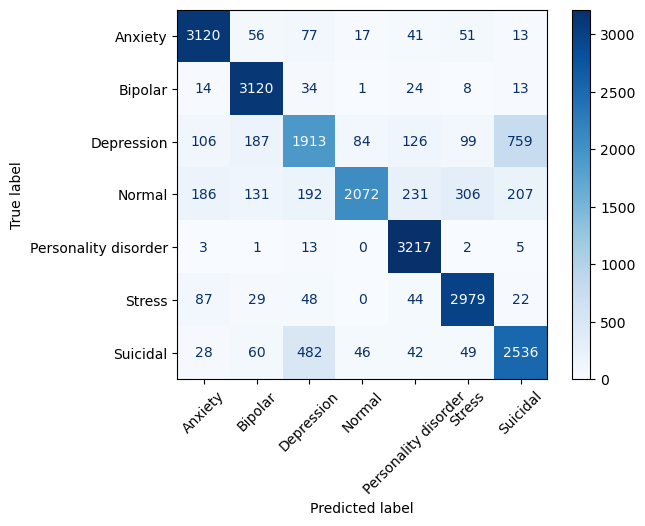

In [123]:
# Sample hyperpameter 2:

param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0], 'fit_prior': [True]}
best_nb_clf, best_params, metrics = tune_naive_bayes(X_resampled, y_resampled, param_grid)

print("Best Parameters:", best_params)
print("Classification Report:")
print(metrics['classification_report'])
print(f"ROC-AUC: {metrics['ROC-AUC']:.2f}")

# Display the confusion matrix
plt.figure(figsize=(10, 8))
conf_matrix_display = ConfusionMatrixDisplay(metrics['confusion_matrix'], display_labels=best_nb_clf.classes_)
conf_matrix_display.plot(cmap='Blues', xticks_rotation=45)
plt.show()


Best Parameters: {'alpha': 0.01, 'fit_prior': False}
Classification Report:
                      precision    recall  f1-score   support

             Anxiety       0.89      0.94      0.91      3375
             Bipolar       0.88      0.98      0.93      3214
          Depression       0.71      0.60      0.65      3274
              Normal       0.94      0.64      0.76      3325
Personality disorder       0.89      0.99      0.94      3241
              Stress       0.88      0.94      0.91      3209
            Suicidal       0.71      0.80      0.75      3243

            accuracy                           0.84     22881
           macro avg       0.84      0.84      0.84     22881
        weighted avg       0.84      0.84      0.84     22881

ROC-AUC: 0.98


<Figure size 1000x800 with 0 Axes>

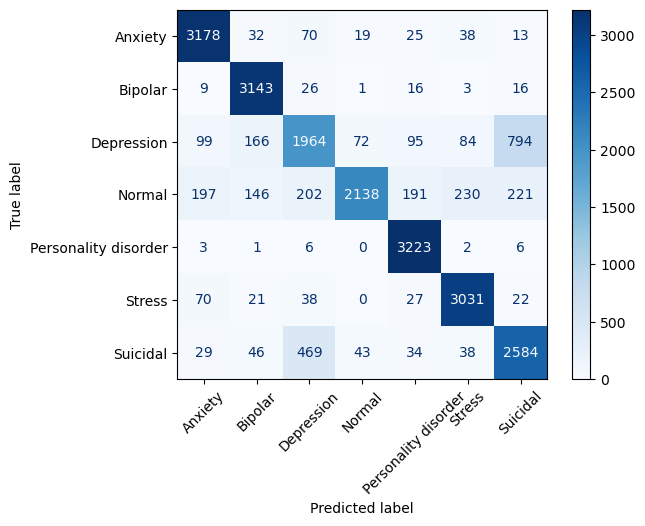

In [124]:
# Sample hyperparameter 3:

param_grid = {'alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0], 'fit_prior': [True, False]}
best_nb_clf, best_params, metrics = tune_naive_bayes(X_resampled, y_resampled, param_grid)

print("Best Parameters:", best_params)
print("Classification Report:")
print(metrics['classification_report'])
print(f"ROC-AUC: {metrics['ROC-AUC']:.2f}")

# Display the confusion matrix
plt.figure(figsize=(10, 8))
conf_matrix_display = ConfusionMatrixDisplay(metrics['confusion_matrix'], display_labels=best_nb_clf.classes_)
conf_matrix_display.plot(cmap='Blues', xticks_rotation=45)
plt.show()


Best Parameters: {'alpha': 0.01, 'fit_prior': True}
Classification Report:
                      precision    recall  f1-score   support

             Anxiety       0.89      0.94      0.92      3375
             Bipolar       0.88      0.98      0.93      3214
          Depression       0.71      0.60      0.65      3274
              Normal       0.94      0.64      0.76      3325
Personality disorder       0.89      0.99      0.94      3241
              Stress       0.88      0.94      0.91      3209
            Suicidal       0.71      0.80      0.75      3243

            accuracy                           0.84     22881
           macro avg       0.84      0.84      0.84     22881
        weighted avg       0.84      0.84      0.84     22881

ROC-AUC: 0.98


<Figure size 1000x800 with 0 Axes>

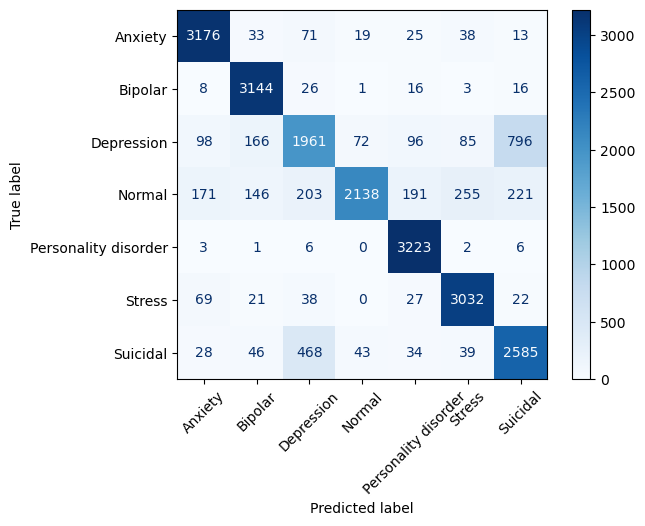

In [125]:
# Sample hyperparameter 4:
param_grid = {'alpha': [0.01, 0.05, 0.1, 0.5, 1.0], 'fit_prior': [True]}
best_nb_clf, best_params, metrics = tune_naive_bayes(X_resampled, y_resampled, param_grid)

print("Best Parameters:", best_params)
print("Classification Report:")
print(metrics['classification_report'])
print(f"ROC-AUC: {metrics['ROC-AUC']:.2f}")

# Display the confusion matrix
plt.figure(figsize=(10, 8))
conf_matrix_display = ConfusionMatrixDisplay(metrics['confusion_matrix'], display_labels=best_nb_clf.classes_)
conf_matrix_display.plot(cmap='Blues', xticks_rotation=45)
plt.show()


# Logistic Regression

In [126]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression classifier
logreg_clf = LogisticRegression(max_iter=500, random_state=42)

# Train the classifier
logreg_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_clf.predict(X_test)
y_prob = logreg_clf.predict_proba(X_test)

# Print classification report for each label
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Binarize the output labels for ROC-AUC calculation (for multi-class problems)
y_test_bin = label_binarize(y_test, classes=logreg_clf.classes_)
roc_auc = roc_auc_score(y_test_bin, y_prob, multi_class='ovr')

# Print the ROC-AUC score
print(f"ROC-AUC: {roc_auc:.2f}")


Classification Report:

                      precision    recall  f1-score   support

             Anxiety       0.94      0.95      0.95      3375
             Bipolar       0.96      0.96      0.96      3214
          Depression       0.75      0.64      0.69      3274
              Normal       0.85      0.91      0.88      3325
Personality disorder       0.97      0.99      0.98      3241
              Stress       0.91      0.95      0.93      3209
            Suicidal       0.73      0.74      0.74      3243

            accuracy                           0.88     22881
           macro avg       0.87      0.88      0.87     22881
        weighted avg       0.87      0.88      0.87     22881

ROC-AUC: 0.98


# Hyperparameter Tuning

Best Parameters: {'C': 1.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Classification Report:

                      precision    recall  f1-score   support

             Anxiety       0.93      0.94      0.94      3375
             Bipolar       0.96      0.96      0.96      3214
          Depression       0.75      0.62      0.68      3274
              Normal       0.84      0.92      0.87      3325
Personality disorder       0.96      0.99      0.98      3241
              Stress       0.90      0.93      0.92      3209
            Suicidal       0.74      0.74      0.74      3243

            accuracy                           0.87     22881
           macro avg       0.87      0.87      0.87     22881
        weighted avg       0.87      0.87      0.87     22881

ROC-AUC: 0.98


<Figure size 1000x800 with 0 Axes>

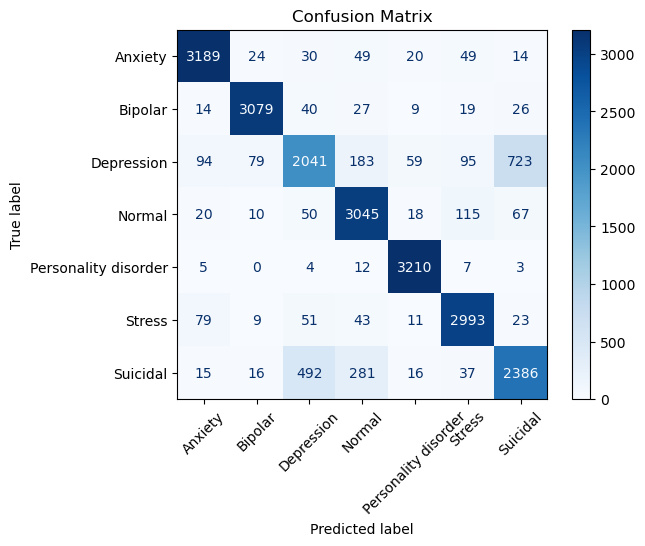

In [127]:

# Function to train and evaluate the Logistic Regression model
def train_and_evaluate(X_resampled, y_resampled, param_grid=None):
    # Split the resampled data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

    # Initialize the Logistic Regression classifier
    logreg_clf = LogisticRegression(random_state=42)

    # Using GridSearchCV for hyperparameter tuning
    if param_grid:
        grid_search = GridSearchCV(logreg_clf, param_grid, scoring='accuracy', cv=3, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        logreg_clf = grid_search.best_estimator_
        print("Best Parameters:", grid_search.best_params_)
    else:
        logreg_clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = logreg_clf.predict(X_test)
    y_prob = logreg_clf.predict_proba(X_test)

    # Print classification report for each label
    print("Classification Report:\n")
    print(classification_report(y_test, y_pred))

    # Binarize the output labels for ROC-AUC calculation (for multi-class problems)
    y_test_bin = label_binarize(y_test, classes=logreg_clf.classes_)
    roc_auc = roc_auc_score(y_test_bin, y_prob, multi_class='ovr')

    # Print the ROC-AUC score
    print(f"ROC-AUC: {roc_auc:.2f}")

    # Compute and display the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred, labels=logreg_clf.classes_)
    plt.figure(figsize=(10, 8))
    conf_matrix_display = ConfusionMatrixDisplay(conf_matrix, display_labels=logreg_clf.classes_)
    conf_matrix_display.plot(cmap='Blues', xticks_rotation=45)
    plt.title('Confusion Matrix')
    plt.show()

# Define the simplified parameter grid for hyperparameter tuning 1
param_grid = {
    'C': [0.1, 1.0],
    'solver': ['liblinear'],
    'penalty': ['l2'],
    'max_iter': [100]
}

# Call the function with the simplified parameter grid for hyperparameter tuning
train_and_evaluate(X_resampled, y_resampled, param_grid=param_grid)

Best Parameters: {'C': 5.0, 'max_iter': 150, 'penalty': 'l2', 'solver': 'liblinear'}
Classification Report:

                      precision    recall  f1-score   support

             Anxiety       0.96      0.98      0.97      3375
             Bipolar       0.97      0.98      0.98      3214
          Depression       0.77      0.65      0.71      3274
              Normal       0.89      0.92      0.90      3325
Personality disorder       0.98      1.00      0.99      3241
              Stress       0.93      0.98      0.95      3209
            Suicidal       0.75      0.76      0.75      3243

            accuracy                           0.89     22881
           macro avg       0.89      0.89      0.89     22881
        weighted avg       0.89      0.89      0.89     22881

ROC-AUC: 0.98


<Figure size 1000x800 with 0 Axes>

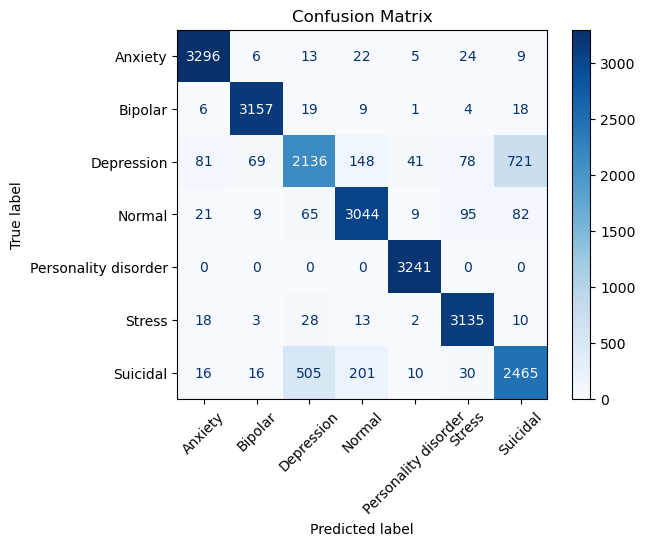

In [128]:
# Define the simplified parameter grid for hyperparameter tuning 2
param_grid = {
    'C': [0.5, 1.0, 5.0],
    'solver': ['liblinear'],  
    'penalty': ['l2'],
    'max_iter': [150]  
}

# Call the function with the simplified parameter grid for hyperparameter tuning
train_and_evaluate(X_resampled, y_resampled, param_grid=param_grid)

Best Parameters: {'C': 10.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Classification Report:

                      precision    recall  f1-score   support

             Anxiety       0.96      0.98      0.97      3375
             Bipolar       0.97      0.99      0.98      3214
          Depression       0.78      0.67      0.72      3274
              Normal       0.90      0.91      0.90      3325
Personality disorder       0.98      1.00      0.99      3241
              Stress       0.94      0.99      0.96      3209
            Suicidal       0.75      0.77      0.76      3243

            accuracy                           0.90     22881
           macro avg       0.90      0.90      0.90     22881
        weighted avg       0.90      0.90      0.90     22881

ROC-AUC: 0.98


<Figure size 1000x800 with 0 Axes>

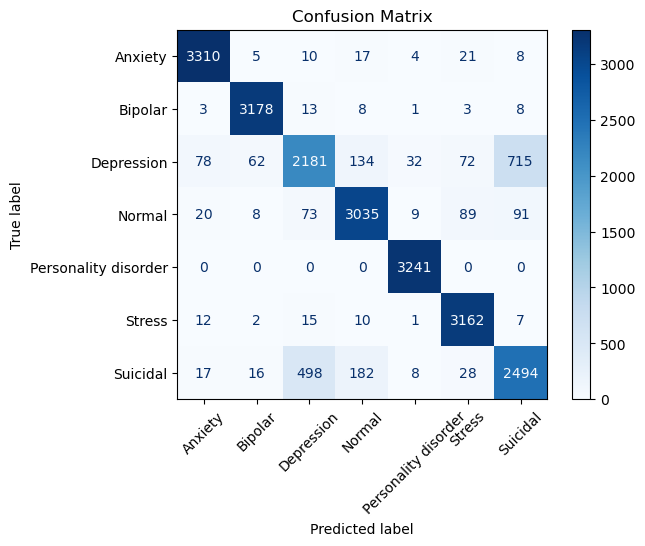

In [129]:
# Define the simplified parameter grid for hyperparameter tuning 3
param_grid = {
    'C': [1.0, 10.0],
    'solver': ['liblinear'],  
    'penalty': ['l2'],
    'max_iter': [100, 200]  
}

# Call the function with the simplified parameter grid for hyperparameter tuning
train_and_evaluate(X_resampled, y_resampled, param_grid=param_grid)

Best Parameters: {'C': 10.0, 'max_iter': 500, 'penalty': 'l2', 'solver': 'liblinear'}
Classification Report:

                      precision    recall  f1-score   support

             Anxiety       0.96      0.98      0.97      3375
             Bipolar       0.97      0.99      0.98      3214
          Depression       0.78      0.67      0.72      3274
              Normal       0.90      0.91      0.90      3325
Personality disorder       0.98      1.00      0.99      3241
              Stress       0.94      0.99      0.96      3209
            Suicidal       0.75      0.77      0.76      3243

            accuracy                           0.90     22881
           macro avg       0.90      0.90      0.90     22881
        weighted avg       0.90      0.90      0.90     22881

ROC-AUC: 0.98


<Figure size 1000x800 with 0 Axes>

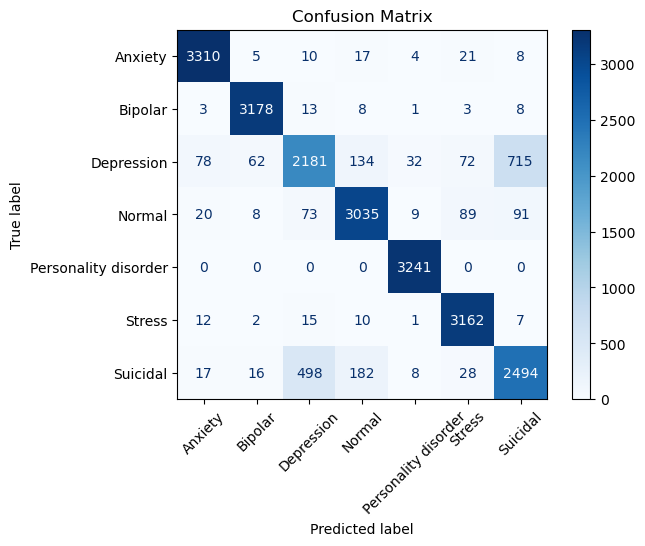

In [130]:
# Define the simplified parameter grid for hyperparameter tuning 4
param_grid = {
    'C': [1.0, 10.0],
    'solver': ['liblinear'],  
    'penalty': ['l2'],
    'max_iter': [500]  
}

# Call the function with the simplified parameter grid for hyperparameter tuning
train_and_evaluate(X_resampled, y_resampled, param_grid=param_grid)

# Traditional Deep Learning Models

# Long Short-Term Memory (LSTM)

In [131]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

X = df['cleaned_statement']  # Use preprocessed text data
y = df['status']  # Use the original status labels (categorical)

# Tokenize the text data
vocab_size = 2000  
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)

# Pad sequences to ensure uniform input size
max_len = 100  
X_pad = pad_sequences(X_seq, maxlen=max_len)

# Convert labels to numeric (one-hot encode)
y_numeric = pd.get_dummies(y).values

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_pad, y_numeric)

# Check the new class distribution, sorted by label
resampled_counter = Counter(y_resampled.argmax(axis=1))
sorted_resampled_counter = dict(sorted(resampled_counter.items()))

print('Original dataset shape:', Counter(y))
print('Resampled dataset shape:', sorted_resampled_counter)



Original dataset shape: Counter({'Normal': 16343, 'Depression': 15404, 'Suicidal': 10652, 'Anxiety': 3841, 'Bipolar': 2777, 'Stress': 2587, 'Personality disorder': 1077})
Resampled dataset shape: {0: 16343, 1: 16343, 2: 16343, 3: 16343, 4: 16343, 5: 16343, 6: 16343}


In [132]:
# Split the resampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Build the simplified LSTM model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=64))  # Embedding layer
model.add(LSTM(64, return_sequences=False))  # LSTM layer
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Print model summary to check the shapes
model.summary()

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), verbose=2)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.2f}')

# Predict probabilities
y_pred_prob = model.predict(X_test)

# Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)
y_test_class = np.argmax(y_test, axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test_class, y_pred))

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')
print(f'ROC-AUC: {roc_auc:.2f}')


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 64)          128000    
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 7)                 231       
                                                                 
Total params: 163,335
Trainable params: 163,335
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1430/1430 - 45s - loss: 1.3896 - accuracy: 0.4315 - val_loss: 1.2381 - val_accuracy: 0.4957 - 45s/epoch - 32ms/step
Epoch 2/5
1430/1430 - 35s - loss: 1.1698 - accuracy: 0

# Hyperparameter Tuning

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 64)          128000    
                                                                 
 lstm_4 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 7)                 231       
                                                                 
Total params: 163,335
Trainable params: 163,335
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1430/1430 - 70s - loss: 1.4158 - accur

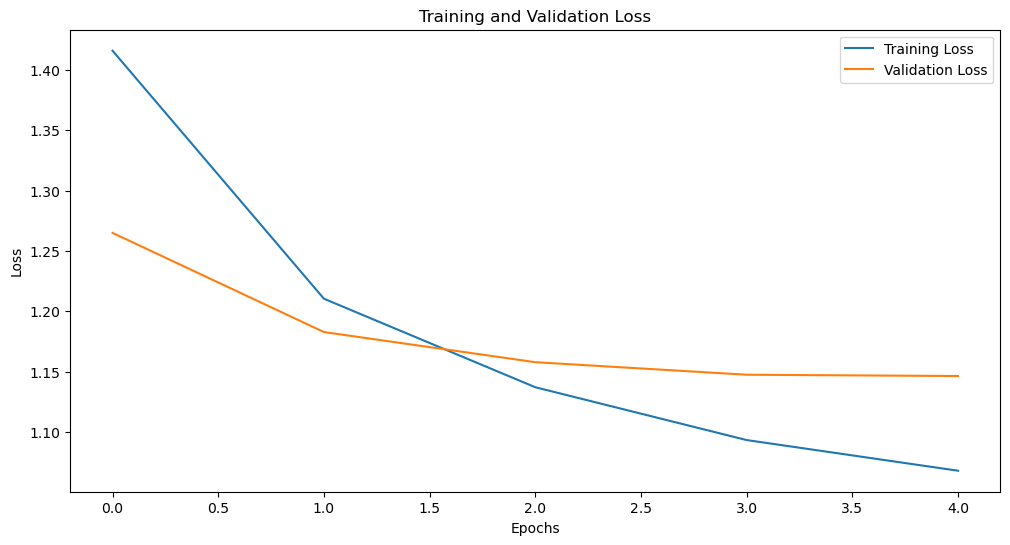

In [133]:
from tensorflow.keras.layers import Dropout

def preprocess_data(df, vocab_size, max_len):
    """
    Tokenizes and pads the text data, applies SMOTE, and splits the data into training and test sets.
    
    Args:
    - df: DataFrame containing 'cleaned_statement' and 'status'.
    - vocab_size: Number of words to keep in the tokenizer.
    - max_len: Maximum length of sequences for padding.
    
    Returns:
    - X_train, X_test, y_train, y_test: Split and resampled data.
    """
    X = df['cleaned_statement']
    y = df['status']
    
    # Tokenize the text data
    tokenizer = Tokenizer(num_words=vocab_size)
    tokenizer.fit_on_texts(X)
    X_seq = tokenizer.texts_to_sequences(X)
    
    # Pad sequences to ensure uniform input size
    X_pad = pad_sequences(X_seq, maxlen=max_len)
    
    # Convert labels to numeric (one-hot encode)
    y_numeric = pd.get_dummies(y).values
    
    # Apply SMOTE to balance the dataset
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_pad, y_numeric)
    
    # Split the resampled data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
    
    return X_train, X_test, y_train, y_test, tokenizer

def build_and_train_lstm(X_train, y_train, X_test, y_test, vocab_size, embedding_dim, lstm_units, dropout_rate, epochs, batch_size):
    """
    Builds, compiles, and trains an LSTM model with specified hyperparameters.
    
    Args:
    - X_train, y_train: Training data.
    - X_test, y_test: Test data.
    - vocab_size: Size of the vocabulary.
    - embedding_dim: Dimension of the embedding layer.
    - lstm_units: Number of units in the LSTM layer.
    - dropout_rate: Dropout rate.
    - epochs: Number of training epochs.
    - batch_size: Batch size for training.
    
    Returns:
    - model: Trained Keras model.
    - history: Training history (loss and accuracy).
    """
    # Build the LSTM model
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim))
    model.add(LSTM(lstm_units, return_sequences=False))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(y_train.shape[1], activation='softmax'))

    # Print model summary to check the shapes
    model.summary()
    
    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Train the model
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=2)
    
    return model, history

def evaluate_model(model, X_test, y_test):
    """
    Evaluates the model and prints performance metrics.
    
    Args:
    - model: Trained Keras model.
    - X_test, y_test: Test data.
    
    Returns:
    - None
    """
    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f'Test Accuracy: {accuracy:.2f}')
    
    # Predict probabilities
    y_pred_prob = model.predict(X_test)
    
    # Convert predicted probabilities to class labels
    y_pred = np.argmax(y_pred_prob, axis=1)
    y_test_class = np.argmax(y_test, axis=1)
    
    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test_class, y_pred))
    
    # Calculate ROC-AUC score
    roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')
    print(f'ROC-AUC: {roc_auc:.2f}')

def plot_training_history(history):
    """
    Plots the training and validation loss curves.
    
    Args:
    - history: Training history (loss and accuracy).
    
    Returns:
    - None
    """
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Main execution
if __name__ == "__main__":
    
    # Sample Hyperparameters 1
    vocab_size = 2000
    max_len = 200
    embedding_dim = 64
    lstm_units = 64
    dropout_rate = 0.3
    epochs = 5
    batch_size = 64
    
    # Preprocess data
    X_train, X_test, y_train, y_test, tokenizer = preprocess_data(df, vocab_size, max_len)
    
    # Build and train the model
    model, history = build_and_train_lstm(X_train, y_train, X_test, y_test, vocab_size, embedding_dim, lstm_units, dropout_rate, epochs, batch_size)
    
    # Evaluate the model
    evaluate_model(model, X_test, y_test)
    
    # Plot training and validation loss
    plot_training_history(history)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, None, 100)         200000    
                                                                 
 lstm_5 (LSTM)               (None, 128)               117248    
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_16 (Dense)            (None, 32)                4128      
                                                                 
 dense_17 (Dense)            (None, 7)                 231       
                                                                 
Total params: 321,607
Trainable params: 321,607
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1430/1430 - 70s - loss: 1.3801 - accur

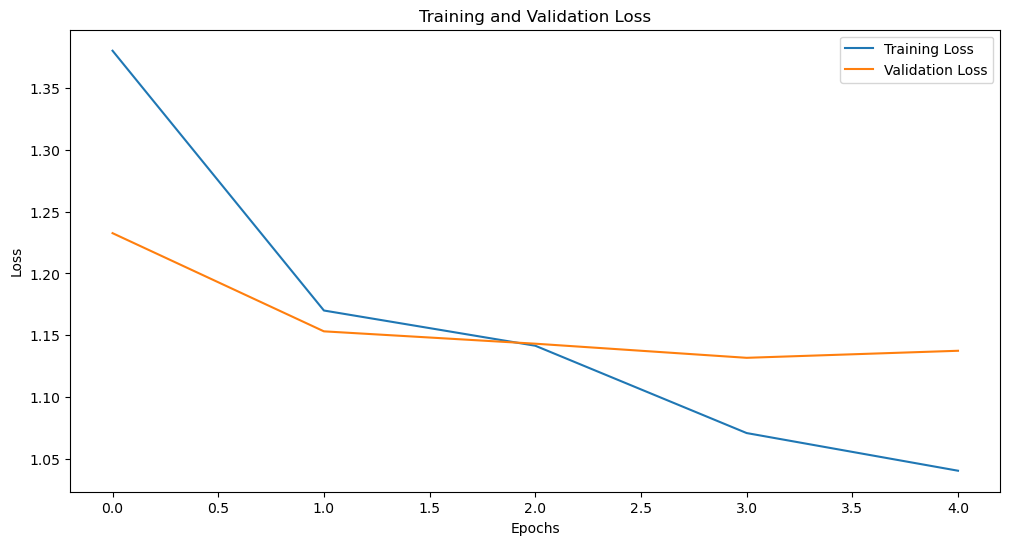

In [134]:
# Main execution
if __name__ == "__main__":
    
    # Sample Hyperparameters 2
    vocab_size = 2000
    max_len = 200
    embedding_dim = 100
    lstm_units = 128
    dropout_rate = 0.3
    epochs = 5
    batch_size = 64
    
    # Preprocess data
    X_train, X_test, y_train, y_test, tokenizer = preprocess_data(df, vocab_size, max_len)
    
    # Build and train the model
    model, history = build_and_train_lstm(X_train, y_train, X_test, y_test, vocab_size, embedding_dim, lstm_units, dropout_rate, epochs, batch_size)
    
    # Evaluate the model
    evaluate_model(model, X_test, y_test)
    
    # Plot training and validation loss
    plot_training_history(history)



# Recurrent Neural Network (RNN)

In [135]:
from tensorflow.keras.layers import  SimpleRNN

X = df['cleaned_statement']  # Use preprocessed text data
y = df['status']  # Use the original status labels (categorical)

# Tokenize the text data
vocab_size = 2000 
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)

# Pad sequences to ensure uniform input size
max_len = 100  
X_pad = pad_sequences(X_seq, maxlen=max_len)

# Convert labels to numeric (one-hot encode)
y_numeric = pd.get_dummies(y).values

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_pad, y_numeric)

# Check the new class distribution, sorted by label
resampled_counter = Counter(y_resampled.argmax(axis=1))
sorted_resampled_counter = dict(sorted(resampled_counter.items()))

print('Original dataset shape:', Counter(y))
print('Resampled dataset shape:', sorted_resampled_counter)

Original dataset shape: Counter({'Normal': 16343, 'Depression': 15404, 'Suicidal': 10652, 'Anxiety': 3841, 'Bipolar': 2777, 'Stress': 2587, 'Personality disorder': 1077})
Resampled dataset shape: {0: 16343, 1: 16343, 2: 16343, 3: 16343, 4: 16343, 5: 16343, 6: 16343}


In [136]:

# Split the resampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Build the simplified RNN model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=32, input_length=max_len))  
model.add(SimpleRNN(64, return_sequences=False))  # Simple RNN layer
model.add(Dropout(0.3))  
model.add(Dense(16, activation='relu'))  
model.add(Dense(y_train.shape[1], activation='softmax'))

# Print model summary to check the shapes
model.summary()

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=3, batch_size=32, validation_data=(X_test, y_test), verbose=2)  

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.2f}')

# Predict probabilities
y_pred_prob = model.predict(X_test)

# Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)
y_test_class = np.argmax(y_test, axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test_class, y_pred))

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')
print(f'ROC-AUC: {roc_auc:.2f}')

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 100, 32)           64000     
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 64)                6208      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_18 (Dense)            (None, 16)                1040      
                                                                 
 dense_19 (Dense)            (None, 7)                 119       
                                                                 
Total params: 71,367
Trainable params: 71,367
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
2860/2860 - 593s - loss: 1.4918 - accura

# Hyperparameter Tuning

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 200, 16)           32000     
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 32)                1568      
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                                 
 dense_20 (Dense)            (None, 8)                 264       
                                                                 
 dense_21 (Dense)            (None, 7)                 63        
                                                                 
Total params: 33,895
Trainable params: 33,895
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
5720/5720 - 2513s - loss: 1.5493 - accu

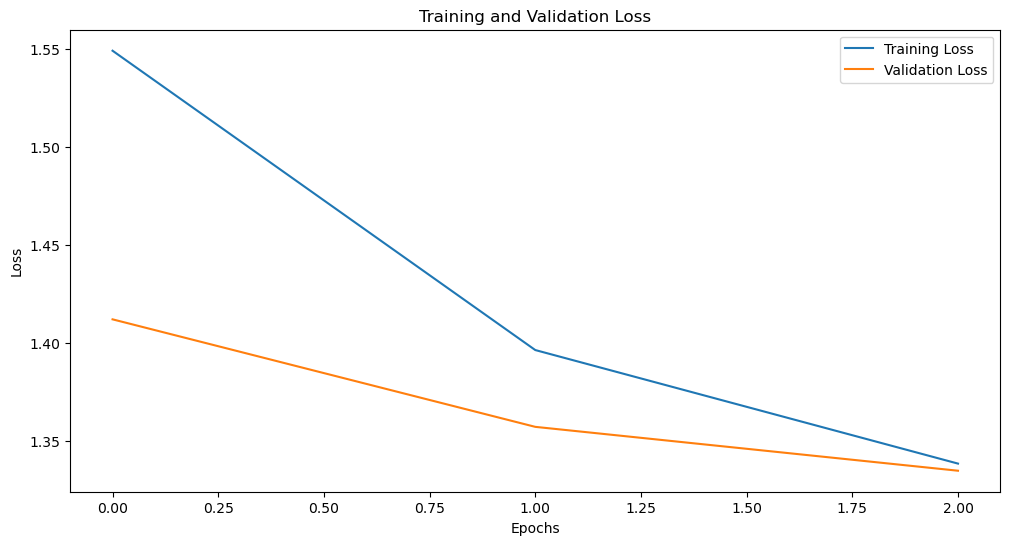

In [137]:

def preprocess_data(df, vocab_size, max_len):
    # Tokenize the text data
    tokenizer = Tokenizer(num_words=vocab_size)
    tokenizer.fit_on_texts(df['cleaned_statement'])
    X_seq = tokenizer.texts_to_sequences(df['cleaned_statement'])

    # Pad sequences to ensure uniform input size
    X_pad = pad_sequences(X_seq, maxlen=max_len)

    # Convert labels to numeric (one-hot encode)
    y_numeric = pd.get_dummies(df['status']).values

    # Apply SMOTE to balance the dataset
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_pad, y_numeric)

    return X_resampled, y_resampled, tokenizer

def build_rnn_model(vocab_size, max_len, embedding_dim, rnn_units, dense_units, dropout_rate, num_classes):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
    model.add(SimpleRNN(rnn_units, return_sequences=False))
    model.add(Dropout(dropout_rate))
    model.add(Dense(dense_units, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

def train_and_evaluate(model, X_train, y_train, X_test, y_test, epochs, batch_size):
    # Print model summary to check the shapes
    model.summary()

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model and store the training history
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=2)

    # Evaluate the model on the test data
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f'Test Accuracy: {accuracy:.2f}')

    # Predict probabilities
    y_pred_prob = model.predict(X_test)

    # Convert predicted probabilities to class labels
    y_pred = np.argmax(y_pred_prob, axis=1)
    y_test_class = np.argmax(y_test, axis=1)

    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test_class, y_pred))

    # Calculate ROC-AUC score
    roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')
    print(f'ROC-AUC: {roc_auc:.2f}')

    return history

def plot_training_history(history):
    """
    Plots the training and validation loss curves.

    Args:
    - history: Training history (loss and accuracy).

    Returns:
    - None
    """
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Main execution
if __name__ == "__main__":
    # Sample Hyperparameters 1
    vocab_size = 2000
    max_len = 200
    embedding_dim = 16
    rnn_units = 32
    dense_units = 8
    dropout_rate = 0.3
    epochs = 3
    batch_size = 16

    # Preprocess data
    X_resampled, y_resampled, tokenizer = preprocess_data(df, vocab_size, max_len)

    # Split the resampled data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

    # Number of classes based on the one-hot encoded labels
    num_classes = y_train.shape[1]

    # Build the model
    model = build_rnn_model(vocab_size, max_len, embedding_dim, rnn_units, dense_units, dropout_rate, num_classes)

    # Train and evaluate the model, and get the training history
    history = train_and_evaluate(model, X_train, y_train, X_test, y_test, epochs, batch_size)

    # Plot training and validation loss
    plot_training_history(history)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 150, 16)           48000     
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 32)                1568      
                                                                 
 dropout_9 (Dropout)         (None, 32)                0         
                                                                 
 dense_22 (Dense)            (None, 8)                 264       
                                                                 
 dense_23 (Dense)            (None, 7)                 63        
                                                                 
Total params: 49,895
Trainable params: 49,895
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
5720/5720 - 3446s - loss: 1.5470 - accu

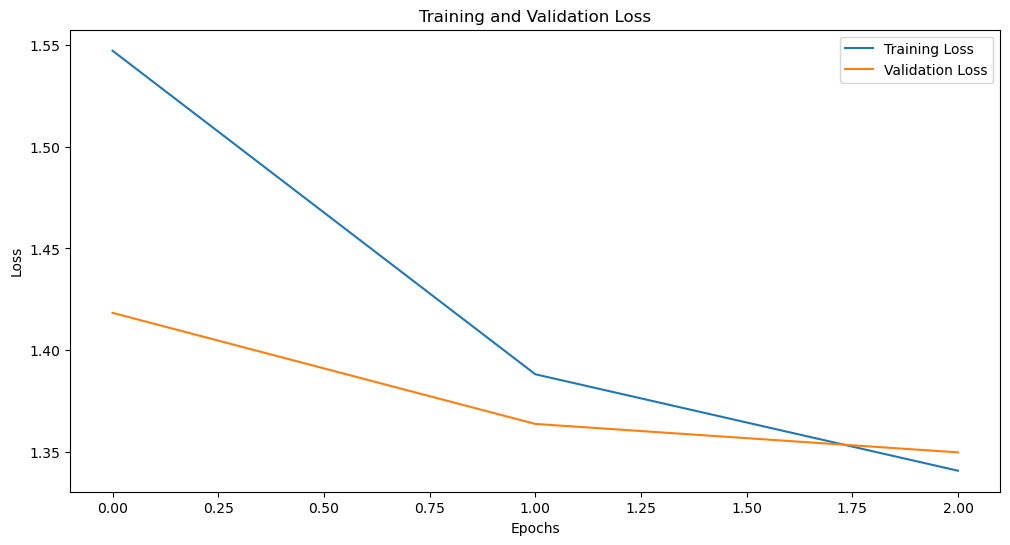

In [138]:
# Main execution
if __name__ == "__main__":
    # Sample Hyperparameters 2
    vocab_size = 3000
    max_len = 150
    embedding_dim = 16
    rnn_units = 32
    dense_units = 8
    dropout_rate = 0.4
    epochs = 3
    batch_size = 16

    # Preprocess data
    X_resampled, y_resampled, tokenizer = preprocess_data(df, vocab_size, max_len)

    # Split the resampled data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

    # Number of classes based on the one-hot encoded labels
    num_classes = y_train.shape[1]

    # Build the model
    model = build_rnn_model(vocab_size, max_len, embedding_dim, rnn_units, dense_units, dropout_rate, num_classes)

    # Train and evaluate the model, and get the training history
    history = train_and_evaluate(model, X_train, y_train, X_test, y_test, epochs, batch_size)

    # Plot training and validation loss
    plot_training_history(history)